# This notebook automatically reads the PCA output by biodivmapR and saves each band in the PCA files as a .png image file to local storage. 

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
# 16 Oct 2023: gdal must be imported first, and then rasterio can be imported
from osgeo import gdal
import rasterio as rio
from rasterio.plot import show

In [2]:
# Set some directories. Here we use absolute directories. 
cwd = 'c:\\Users\\m1865\\Desktop\\Ticino'
cwd_Sentinel = cwd + "\\ProcessedData"
cwd_Sentinel_PCA = cwd + "\\Results"

In [5]:
# Get the name of all the rasters in our folder
raster_Names = []
for item in [name.split('.')[0] for name in os.listdir(cwd_Sentinel)]:
    if item not in raster_Names:
        item = item + "Cropped"
        raster_Names.append(item)
raster_Names

['2022 06Cropped', '2022 09Cropped']

In [6]:
# Get the paths of all the PCA results
path_PCA = []
for name in raster_Names:
    temp = cwd_Sentinel_PCA + "\\" + name + "\\SPCA\\PCA"
    path_PCA.append(temp)
path_PCA

['c:\\Users\\m1865\\Desktop\\Ticino\\Results\\2022 06Cropped\\SPCA\\PCA',
 'c:\\Users\\m1865\\Desktop\\Ticino\\Results\\2022 09Cropped\\SPCA\\PCA']

In [8]:
# Save the PCA results produced in R Studio to a list
list_PCA = []
for path in path_PCA:
    temp = rio.open(path + "\\OutputPCA_8_PCs")
    list_PCA.append(temp)
list_PCA

[<open DatasetReader name='c:/Users/m1865/Desktop/Ticino/Results/2022 06Cropped/SPCA/PCA/OutputPCA_8_PCs' mode='r'>,
 <open DatasetReader name='c:/Users/m1865/Desktop/Ticino/Results/2022 09Cropped/SPCA/PCA/OutputPCA_8_PCs' mode='r'>]

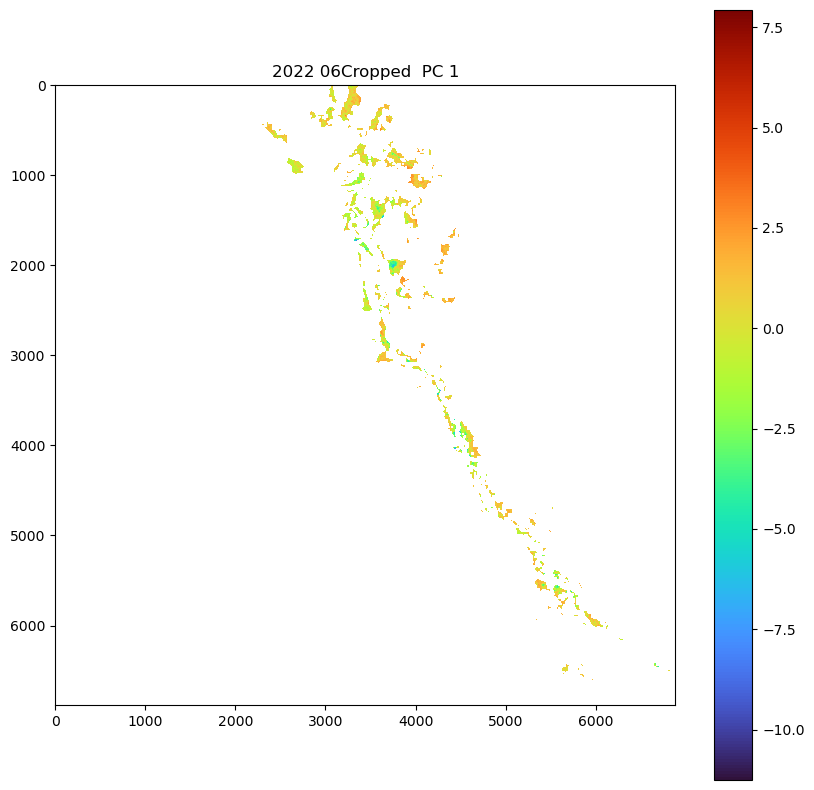

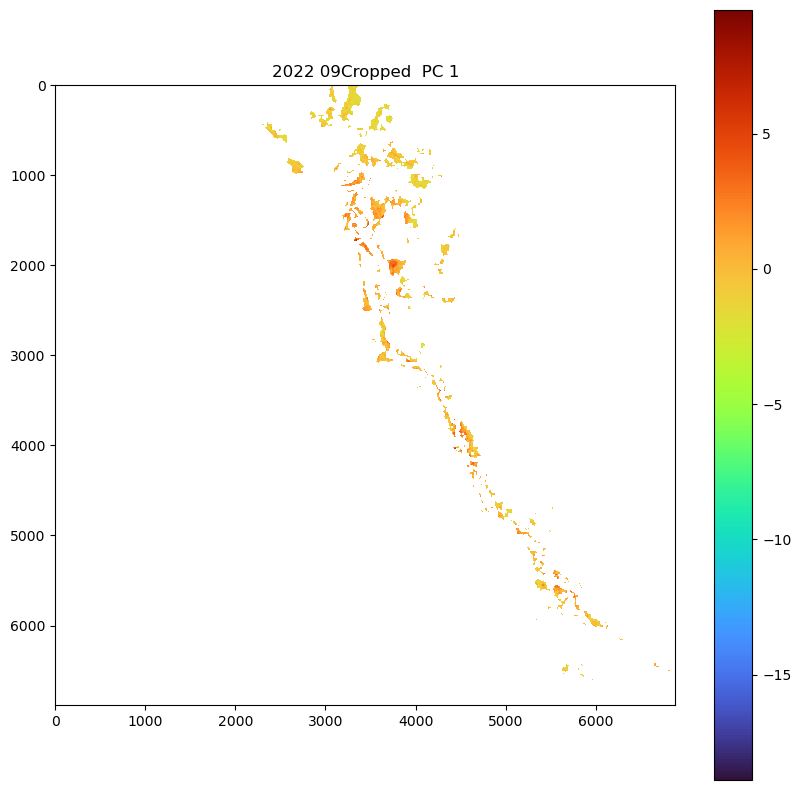

In [10]:
# Save figures
count = 0
for PCA in list_PCA:
    for i in range(PCA.count):
        temp = PCA.read(i+1)
        fig = plt.figure(figsize = (10, 10))
        plt.title(raster_Names[count] + "  PC " + str(i+1))
        # show(temp, ax = ax, cmap = 'turbo')
        plt.imshow(temp, vmin = np.nanmin(temp),vmax = np.nanmax(temp), cmap = 'turbo')
        plt.colorbar()
        plt.savefig(path_PCA[count] + "\\Fig\\PC" + str(i+1) + ".png")
        # We need to close the plot otherwise the output cell will be overwhelmed with the plots
        if i != 0:
            plt.close()
    count = count + 1

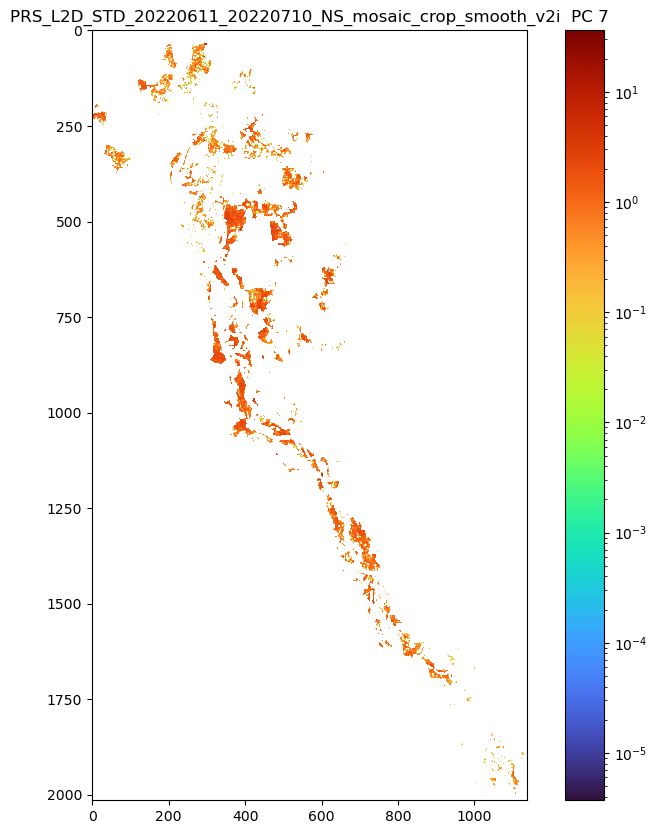

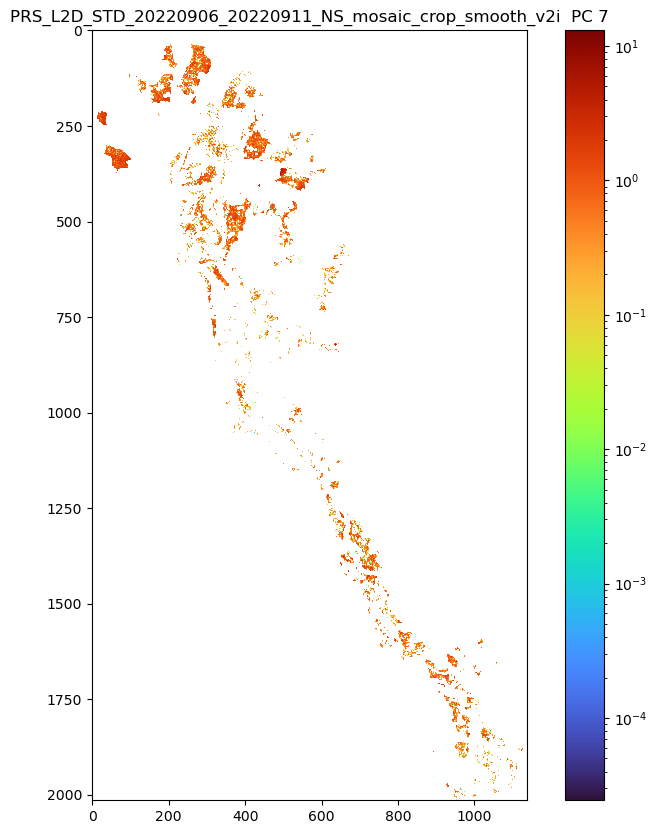

In [ ]:
# Trying normalized plots
count = 0
for PCA in list_PCA:
    for i in range(PCA.count):
        if i == 6: 
            temp = PCA.read(i+1)
            fig = plt.figure(figsize = (10, 10))
            plt.title(raster_Names[count] + "  PC " + str(i+1))
            # show(temp, ax = ax, cmap = 'turbo')
            temp_Img = plt.imshow(temp, norm = colors.LogNorm(), cmap = 'turbo')
            plt.colorbar(temp_Img)
            # plt.savefig(path_PCA[count] + "\\Fig\\PC" + str(i+1) + ".png")
            # We need to close the plot otherwise the output cell will be overwhelmed with the plots
            # if i != 0:
            #     plt.close()
    count = count + 1